# <center><font color='blue'>SENTIMENT ANALYSIS: COVID</center></font>

## <font color='#2471A3'> Table of contents </font>

- [1 - Objectives](#1)
- [2 - Setup](#2)
- [3 - Data Loading and visualization](#3)
- [4 - Data Pre-processing](#4)
    - [4.1. - Handling missing data](#4.1)
    - [4.2. - Separate features from target](#4.2)
    - [4.3. - Categorical data](#4.3)
    - [4.4. - Train/val split](#4.4)
    - [4.5. - Class balance](#4.5)
    - [4.6. - Pre-process for NLP](#4.6)
    - [4.7. - Prepare datasets for TensorFlow](#4.7)
- [5 - Model Selection](#5)
    - [5.1. - Embedding layer](#5.1)
    - [5.2. - Compile and fit](#5.2)
    - [5.3. - Trying different models](#5.3)
        - [5.3.1. - Model 1 - Simple model](#5.3.1)
        - [5.3.2. - Model 2 - LSTM](#5.3.2)
        - [5.3.3. - Model 3 - GRU](#5.3.3)
        - [5.3.4. - Model 4 - Bidirectional RNN](#5.3.4)
        - [5.3.5. - Model 5 - Stacking layers](#5.3.5)
        - [5.3.6. - Model 6 - Conv1D](#5.3.6)
        - [5.3.7. - Model 7 - TF Hub Pretrained Sentence Encoder](#5.3.7)
    - [5.4. - Choosing the best model](#5.4)
- [6 - Hyperparameter tunning](#6)
- [7 - Predictions with the final model](#7)
- [8 - Analysis of results](#8)
- [9 - Saving the model](#9)
- [10 - Conclusions](#10)

<a name="1"></a>
## <b> <font color='blue'> 1. Objectives </font> </b>

Practice with a natural language processing problem.
<br>
Here, given a set of tweets, analyze whether the sentiment is positive, negative, or neutral.

<a name="2"></a>
## <b> <font color='blue'> 2. Setup </font> </b>

In [1]:
# do not print info and warning messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

In [100]:
# basic imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a name="3"></a>
## <b> <font color='blue'> 3. Data loading and visualization </font> </b>

In [3]:
!ls data

Corona_NLP_test.csv  Corona_NLP_train.csv


We can see that we have 2 datasets, one for training and one for test.

In [4]:
train_data = pd.read_csv('data/Corona_NLP_train.csv',encoding='latin-1')
test_data = pd.read_csv('data/Corona_NLP_test.csv',encoding='latin-1')

In [5]:
# let's see some of the training data
pd.set_option('display.max_colwidth', None) # que No recorte el texto

train_data.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,"As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU",Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,"Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented ""I'm in Civics class so I know what I'm talking about"". https://t.co/ieFDNeHgDO",Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,"Due to COVID-19 our retail store and classroom in Atlanta will not be open for walk-in business or classes for the next two weeks, beginning Monday, March 16. We will continue to process online and phone orders as normal! Thank you for your understanding! https://t.co/kw91zJ5O5i",Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona",Negative


In [6]:
print(f" Training data: (rows, cols) = {train_data.shape}")
print(f" Training data type:  {type(train_data)}")
print(f" Test data: (rows, cols) = {test_data.shape}")
print(f" Test data type:  {type(test_data)}")

 Training data: (rows, cols) = (41157, 6)
 Training data type:  <class 'pandas.core.frame.DataFrame'>
 Test data: (rows, cols) = (3798, 6)
 Test data type:  <class 'pandas.core.frame.DataFrame'>


<a name="4"></a>
## <b> <font color='blue'> 4. Data Pre-processing </font> </b>


<a name="4.1"></a>
### <b> <font color='#5499C7'> 4.1. Handling missing data </font> </b>

In [7]:
print(f'Missing data train:\n {train_data.isnull().sum()} \n')
print(f'Missing data test:\n {test_data.isnull().sum()}')

Missing data train:
 UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64 

Missing data test:
 UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64


There are no missing data in the columns we care about (Original Tweet and Sentiment).

<a name="4.2"></a>
### <b> <font color='#5499C7'> 4.2. Separate features from target </font> </b>

In [8]:
X_train = train_data['OriginalTweet']
y_train = train_data['Sentiment']
X_test = test_data['OriginalTweet']
y_test = test_data['Sentiment']

In [9]:
type(X_train), type(y_train)

(pandas.core.series.Series, pandas.core.series.Series)

<a name="4.3"></a>
### <b> <font color='#5499C7'> 4.3. Categorical data </font> </b>

Our target (Sentiment) is categorical, lets see the different options:

In [10]:
y_train.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

Lets see if there are other options in the test set:

In [11]:
y_test.unique()

array(['Extremely Negative', 'Positive', 'Extremely Positive', 'Negative',
       'Neutral'], dtype=object)

In [12]:
are_same = np.array_equal(np.sort(y_train.unique()), np.sort(y_test.unique()))
print(f"Are unique values the same? {are_same}")

Are unique values the same? True


We are not so interested in whether a sentiment is positive or extremely positive, therefore we will rename the label extremely positive to positive.

In [13]:
y_train = y_train.replace('Extremely Positive', 'Positive').replace('Extremely Negative', 'Negative')
y_test = y_test.replace('Extremely Positive', 'Positive').replace('Extremely Negative', 'Negative')

Check

In [14]:
print(np.sort(y_train.unique()), np.sort(y_test.unique()))

['Negative' 'Neutral' 'Positive'] ['Negative' 'Neutral' 'Positive']


We will not consider that there is an ordinal relationship, therefore we will encode the labels using one-hot encoding.

Remember that we need to apply the same encoding to train and test.

In [15]:
from sklearn.preprocessing import OneHotEncoder


# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit the encoder on the train set
encoder.fit(y_train.values.reshape(-1, 1))

# Transform both train and test sets
one_hot_train = encoder.transform(y_train.values.reshape(-1, 1))
one_hot_test = encoder.transform(y_test.values.reshape(-1, 1))

# Convert to DataFrame for easier inspection
y_train = pd.DataFrame(one_hot_train, columns = encoder.get_feature_names_out(['sentiment']))
y_test = pd.DataFrame(one_hot_test, columns = encoder.get_feature_names_out(['sentiment']))

print("One-hot encoded train set:")
print(y_train)
print("\nOne-hot encoded test set:")
print(y_test)

One-hot encoded train set:
       sentiment_Negative  sentiment_Neutral  sentiment_Positive
0                     0.0                1.0                 0.0
1                     0.0                0.0                 1.0
2                     0.0                0.0                 1.0
3                     0.0                0.0                 1.0
4                     1.0                0.0                 0.0
...                   ...                ...                 ...
41152                 0.0                1.0                 0.0
41153                 1.0                0.0                 0.0
41154                 0.0                0.0                 1.0
41155                 0.0                1.0                 0.0
41156                 1.0                0.0                 0.0

[41157 rows x 3 columns]

One-hot encoded test set:
      sentiment_Negative  sentiment_Neutral  sentiment_Positive
0                    1.0                0.0                 0.0
1           

In this example, handle_unknown='ignore' is used to ensure that any categories present in the test set but not in the train set are handled gracefully. This is useful when you have categories in the test set that were not seen during training.

<a name="4.4"></a>
### <b> <font color='#5499C7'> 4.4. Train/val split </font> </b>

We are going to create a validation dataset.

In [16]:
from sklearn.model_selection import train_test_split 

# Perform the split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


<a name="4.5"></a>
### <b> <font color='#5499C7'> 4.5. Class balance </font> </b>

In [17]:
y_train.value_counts(normalize=True)

sentiment_Negative  sentiment_Neutral  sentiment_Positive
0.0                 0.0                1.0                   0.438238
1.0                 0.0                0.0                   0.374670
0.0                 1.0                0.0                   0.187092
dtype: float64

We have some imbalance with respect to the neutral class. We are going to apply SMOTE to take care of this.

In [18]:
#!pip install imbalanced-learn

In [19]:
"""
from imblearn.over_sampling import SMOTE

# Applyt SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Show the new distribution
print(y_train_resampled.value_counts())

para smote debo tener las etiquetas en formato categórico

"""

'\nfrom imblearn.over_sampling import SMOTE\n\n# Applyt SMOTE only to the training set\nsmote = SMOTE(random_state=42)\nX_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)\n\n# Show the new distribution\nprint(y_train_resampled.value_counts())\n\npara smote debo tener las etiquetas en formato categórico\n\n'

<a name="4.6"></a>
### <b> <font color='#5499C7'> 4.6. Pre-process for NLP </font> </b>

Let's preprocess the text from OriginalTweet, for which:

- We will remove stop words.
- We will remove certain special characters, like "@".
- We will apply lemmatization.

<b>Note:</b> We will also remove punctuation, convert everything to lowercase, and tokenize later using TextVectorization.


In [20]:
from utils import preprocess_text

[nltk_data] Downloading package stopwords to /home/marcos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/marcos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/marcos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Let's try our function:

In [21]:
text = "Hello @world! This is# a sample text."
processed_text = preprocess_text(text)
print(processed_text)

hello world ! sample text .


Let's apply ou pre-process function:

In [22]:
X_train_prep = X_train.apply(preprocess_text)
X_val_prep = X_val.apply(preprocess_text)
X_test_prep = X_test.apply(preprocess_text)

Let' see a few examples:

In [23]:
X_train[0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

In [24]:
X_train_prep[0]

'menyrbie phil_gahan chrisitv'

In [25]:
X_train.index

Int64Index([ 8191,  3725, 22759, 15010, 39142, 30040, 30389, 18537,   919,
            33677,
            ...
            41090, 16023, 21962, 37194, 16850,  6265, 11284, 38158,   860,
            15795],
           dtype='int64', length=32925)

In [26]:
X_train[8191]

'Unemployment claims made online in Virginia this week:\r\r\n\r\r\nMonday: 426\r\r\nTuesday: 2,150\r\r\n\r\r\nAnd the numbers are going to get bigger. https://t.co/fUeg2RL2dl'

In [27]:
X_train_prep[8191]

'unemployment claim made online virginia week : monday : 426 tuesday : 2,150 number going get bigger .'

### Text Vectorization layer

Now we will create and apply a layer called <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization" target='_blank'>TextVectorization</a>, which will remove punctuation, convert everything to lowercase, and tokenize.

In [28]:
VOCAB_SIZE = 10000
sequence_length = 50 # max length our sequences will be (e.g. how many words from a Tweet does a model see?)


vectorizer = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE,
                                    output_mode="int",
                                    output_sequence_length = sequence_length)

# Fit the text vectorizer instance to the training data using the adapt() method
vectorizer.adapt(X_train_prep)

Let' see the 20 firsts tokens:

In [29]:
vocab = np.array(vectorizer.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'coronavirus', 'covid19', 'price', 'store',
       'supermarket', 'food', 'grocery', 'people', 'amp', 'consumer',
       '19', 'covid', 'shopping', 's', 'online', 'need', 'time',
       'pandemic'], dtype='<U27')

We are going to apply this layer to our datasets.

In [30]:
# apply to the datasets
X_train_vectors = vectorizer(X_train_prep)
X_val_vectors = vectorizer(X_val_prep)
X_test_vectors = vectorizer(X_test_prep)

In [31]:
X_train_vectors

<tf.Tensor: shape=(32925, 50), dtype=int64, numpy=
array([[ 821,  743,  232, ...,    0,    0,    0],
       [ 269,  189,    3, ...,    0,    0,    0],
       [   1, 2136, 5977, ...,    0,    0,    0],
       ...,
       [   1,    1, 2221, ...,    0,    0,    0],
       [1033,  127, 1425, ...,    0,    0,    0],
       [1361, 8579,    2, ...,    0,    0,    0]])>

<a name="4.7"></a>
### <b> <font color='#5499C7'> 4.7. Prepare datasets for TensorFlow </font> </b>

In [32]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_vectors, 
                                              y_train.values))


validation_dataset = tf.data.Dataset.from_tensor_slices((X_val_vectors, 
                                              y_val.values))


test_dataset = tf.data.Dataset.from_tensor_slices((X_test_vectors, 
                                              y_test.values))


In [33]:
# let's see an example for train
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  [ 821  743  232   16 3366   47  806    1 1277    1  297   35   20 2672
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
label:  [1. 0. 0.]


We define the size of the buffer and the size of the batch:

In [34]:
BUFFER_SIZE = 10000
BATCH_SIZE = 32

In [35]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
validation_dataset = validation_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

Let's see some examples and their labels

In [36]:
for example, label in train_dataset.take(1):
  print(f'texts:  {example.numpy()[:3]}\n')
  print(f'labels: , {label.numpy()[:3]}')

texts:  [[7005   84 1072 1883  820  234   53   11 6267  387  496 7005    1    3
     2    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [ 305  453   21 1118 3338 2366  139  513  129 5694 4143 1164    8    5
   695   37  124 2627  315 7064 1041  144 1834    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   1    1    4   59  134 3188  124  333  164 1379  620    3   91  986
   134   30   40   40  762 3785  299  958 1846  137    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]]

labels: , [[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


<a name="5"></a>
## <b> <font color='blue'> 5. Model Selection </font> </b>

Let's try different models; all of them are going to have an embedding layer, that's why we are going to start by creating one of them.

Also, we're gonna set the random seed, create a dict to store the results, define a constant with the size of the input and a constant with the number of classes.

In [37]:
tf.random.set_seed(42)

results = {}

INPUT_SHAPE=(sequence_length,)

NUM_CLASSES = 3

In [38]:
# imports
from tensorflow.keras import layers,callbacks,models,Sequential,losses

# function to store the results
from utils import store_results

<a name="5.1"></a>
### <b> <font color='#2874A6'> 5.1. Embedding layer </font> </b>

In [39]:
embedding = tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, # set the input shape; size of our vocabulary
                                 output_dim=128, # set the size of the embedding vector
                                 embeddings_initializer="uniform", # default, initialize embedding vectors randomly
                                 input_length=sequence_length # how long is each input
                             )

embedding

<a name="5.2"></a>
### <b> <font color='#2874A6'> 5.2. Compile and fit the models </font> </b>

Since it will be the same for everyone, we define a function to compile and train the models.


In [40]:
def compile_fit(model, train_dataset, validation_dataset, 
                    epochs=5, loss='categorical_crossentropy', optimizer='adam',
                    metrics=['accuracy', 'Precision','Recall'], verbose = 1):
    # Compile model
    model.compile(loss=loss,
                    optimizer = optimizer,
                    metrics = metrics)

    # Fit the model
    history = model.fit(train_dataset,
                            epochs = epochs,
                            verbose = verbose,
                            validation_data = validation_dataset)
    
    # return
    return history

<a name="5.3"></a>
### <b> <font color='#2874A6'> 5.3. Trying different models </font> </b> 

<a name="5.3.1"></a>
### <b> <font color='#5499C7'> 5.3.1. Model 1 - Simple Model </font> </b>

In [43]:
def build_model_1(name, input_shape = INPUT_SHAPE, num_classes = NUM_CLASSES):
    inputs = layers.Input(shape=input_shape) # inputs are integers
    x = embedding(inputs)
    x = tf.keras.layers.GlobalAveragePooling1D()(x)
    outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(x)
    model = tf.keras.Model(inputs, outputs, name=name) # construct the model
    return model


model_1 = build_model_1('model_1')

model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 128)           1280000   
                                                                 
 global_average_pooling1d_1  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1280387 (4.88 MB)
Trainable params: 1280387 (4.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
history_1 = compile_fit(model_1, train_dataset, validation_dataset)

Epoch 1/5
1029/1029 [==============================] - 17s 16ms/step - loss: 0.8818 - accuracy: 0.6049 - precision: 0.8097 - recall: 0.2820 - val_loss: 0.7327 - val_accuracy: 0.7025 - val_precision: 0.7912 - val_recall: 0.5517
Epoch 2/5
1029/1029 [==============================] - 16s 16ms/step - loss: 0.5910 - accuracy: 0.7870 - precision: 0.8521 - recall: 0.6773 - val_loss: 0.5988 - val_accuracy: 0.7794 - val_precision: 0.8350 - val_recall: 0.7010
Epoch 3/5
1029/1029 [==============================] - 17s 16ms/step - loss: 0.4618 - accuracy: 0.8466 - precision: 0.8851 - recall: 0.7926 - val_loss: 0.5702 - val_accuracy: 0.8025 - val_precision: 0.8403 - val_recall: 0.7528
Epoch 4/5
1029/1029 [==============================] - 17s 16ms/step - loss: 0.3912 - accuracy: 0.8773 - precision: 0.9022 - recall: 0.8448 - val_loss: 0.5622 - val_accuracy: 0.8052 - val_precision: 0.8335 - val_recall: 0.7699
Epoch 5/5
1029/1029 [==============================] - 17s 16ms/step - loss: 0.3446 - accura

In [45]:
# evaluate
score1 = model_1.evaluate(test_dataset)

119/119 [==============================] - 0s 1ms/step - loss: 0.6034 - accuracy: 0.7928 - precision: 0.8108 - recall: 0.7604


In [46]:
# save the results
store_results(results, 'Model 1', score1); # ";" because i do not want to print the output

<a name="5.3.2"></a>
### <b> <font color='#5499C7'> 5.3.2. Model 2 - LSTM </font> </b>

In [52]:
def build_model_2(name, input_shape = INPUT_SHAPE, num_classes = NUM_CLASSES):
    inputs = layers.Input(shape=input_shape, dtype="int64")
    x = embedding(inputs)
    x = layers.LSTM(64, activation="tanh")(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = tf.keras.Model(inputs, outputs, name=name)
    return model
    
model_2 = build_model_2('model_2')

model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 128)           1280000   
                                                                 
 lstm_4 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1329603 (5.07 MB)
Trainable params: 1329603 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
history_2 = compile_fit(model_2, train_dataset, validation_dataset, verbose = 0)

In [54]:
# evaluate
score2 = model_2.evaluate(test_dataset)

119/119 [==============================] - 1s 6ms/step - loss: 0.7806 - accuracy: 0.7804 - precision: 0.7881 - recall: 0.7699


In [55]:
# save the results
store_results(results, 'Model 2', score2);

<a name="5.3.3"></a>
### <b> <font color='#5499C7'> 5.3.3. Model 3 - GRU </font> </b>

In [56]:
def build_model_3(name, input_shape = INPUT_SHAPE, num_classes = NUM_CLASSES):
    inputs = layers.Input(shape = input_shape, dtype="int64")
    x = embedding(inputs)
    x = layers.GRU(64, activation="tanh")(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model= tf.keras.Model(inputs, outputs, name=name)
    return model


model_3 = build_model_3('model_3')

model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1321603 (5.04 MB)
Trainable params: 1321603 (5.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
history_3 = compile_fit(model_3, train_dataset, validation_dataset, verbose = 0)

In [58]:
# evaluate
score3 = model_3.evaluate(test_dataset)

119/119 [==============================] - 1s 5ms/step - loss: 0.9770 - accuracy: 0.7862 - precision: 0.7911 - recall: 0.7817


In [59]:
# save the results
store_results(results, 'Model 3', score3);

<a name="5.3.4"></a>
### <b> <font color='#5499C7'> 5.3.4. Model 4 - Bidirectional RNN </font> </b>

In [60]:
def build_model_4(name, input_shape = INPUT_SHAPE, num_classes =  NUM_CLASSES):
    inputs = layers.Input(shape=input_shape, dtype="int64")
    x = embedding(inputs)
    x = layers.Bidirectional(layers.LSTM(64))(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = tf.keras.Model(inputs, outputs, name=name)
    return model

model_4 = build_model_4('model_4')

model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1387267 (5.29 MB)
Trainable params: 1387267 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [61]:
history_4 = compile_fit(model_4, train_dataset, validation_dataset, verbose = 0)

In [62]:
# evaluate
score4 = model_4.evaluate(test_dataset)

119/119 [==============================] - 1s 7ms/step - loss: 1.3333 - accuracy: 0.7815 - precision: 0.7855 - recall: 0.7773


In [63]:
# save the results
store_results(results, 'Model 4', score4);

<a name="5.3.5"></a>
### <b> <font color='#5499C7'> 5.3.5. Model 5 - Stacking layers </font> </b>

In [64]:
def build_model_5(name, input_shape = INPUT_SHAPE, num_classes = NUM_CLASSES):
    inputs = layers.Input(shape=input_shape, dtype='int64')
    x = embedding(inputs)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # return_sequences=True to stack layers
    x = layers.Bidirectional(layers.LSTM(32))(x)
    x = layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs, name=name)
    return model
    

model_5 = build_model_5('model_5')

model_5.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 128)           1280000   
                                                                 
 bidirectional_1 (Bidirecti  (None, 50, 128)           98816     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0   

In [65]:
history_5 = compile_fit(model_5, train_dataset, validation_dataset, verbose = 0)

In [66]:
# evaluate
score5 = model_5.evaluate(test_dataset)

119/119 [==============================] - 1s 11ms/step - loss: 1.6030 - accuracy: 0.7765 - precision: 0.7797 - recall: 0.7736


In [67]:
# save the results
store_results(results, 'Model 5', score5);

<a name="5.3.6"></a>
### <b> <font color='#5499C7'> 5.3.6. Model 6 - Conv 1D </font> </b>


In [68]:
def build_model_6(name, input_shape = INPUT_SHAPE, num_classes = NUM_CLASSES):
    inputs = layers.Input(shape = input_shape)    
    x = embedding(inputs)
    x = layers.Conv1D(filters = 32, kernel_size= 5, activation="relu")(x)
    x = layers.GlobalMaxPool1D()(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="output_layer")(x)
    model = tf.keras.Model(inputs, outputs, name=name)
    return model
    
    
model_6 = build_model_6('model_6')

model_6.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 46, 32)            20512     
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                                 
 output_layer (Dense)        (None, 3)                 99        
                                                                 
Total params: 1300611 (4.96 MB)
Trainable params: 1300611 (4.96 MB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [69]:
history_6 = compile_fit(model_6, train_dataset, validation_dataset, verbose = 0)

In [70]:
# evaluate
score6 = model_6.evaluate(test_dataset)

119/119 [==============================] - 0s 3ms/step - loss: 1.1940 - accuracy: 0.7686 - precision: 0.7731 - recall: 0.7654


In [71]:
# save the results
store_results(results, 'Model 6', score6);

<a name="5.3.7"></a>
### <b> <font color='#5499C7'> 5.3.7. Model 7 - TensorFlow Hub Pretrained Sentence Encoder </font> </b>

We are going to use the [TensorFlow Hub's Universal Sentence Encoder](https://tfhub.dev/google/universal-sentence-encoder/4)

In [72]:
import tensorflow_hub as hub

In [73]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
# it takes care of text vectorization and embedding

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [74]:
def build_model_7(name, input_shape = INPUT_SHAPE ,num_classes = NUM_CLASSES):
    inputs = layers.Input(shape=(), dtype=tf.string)  # Expect raw text input
    x = sentence_encoder_layer(inputs)  # Encode text to embeddings
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x) 
    outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(x)
    model = models.Model(inputs, outputs, name=name)
    return model

model_7 = build_model_7('model_7')

model_7.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None,)]                 0         
                                                                 
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_11 (Dense)            (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 output_layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 256863875 (979.86 MB)
Trainable params: 66051 (258.01 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In this case, we should not pass the data through our text vectorization layer, as the encoder will also handle this.

In [75]:
# data for this model (remember this model does text vectorization)

train_dataset2 = tf.data.Dataset.from_tensor_slices((X_train_prep, 
                                              y_train.values))
validation_dataset2 = tf.data.Dataset.from_tensor_slices((X_val_prep, 
                                              y_val.values))
test_dataset2 = tf.data.Dataset.from_tensor_slices((X_test_prep, 
                                              y_test.values))


train_dataset2 = train_dataset2.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
validation_dataset2 = validation_dataset2.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset2 = test_dataset2.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [76]:
history_7 = compile_fit(model_7, train_dataset2, validation_dataset2, verbose = 1)

Epoch 1/5
1029/1029 [==============================] - 10s 8ms/step - loss: 0.8156 - accuracy: 0.6394 - precision: 0.7082 - recall: 0.5020 - val_loss: 0.7578 - val_accuracy: 0.6721 - val_precision: 0.7228 - val_recall: 0.5809
Epoch 2/5
1029/1029 [==============================] - 9s 8ms/step - loss: 0.7599 - accuracy: 0.6725 - precision: 0.7233 - recall: 0.5844 - val_loss: 0.7466 - val_accuracy: 0.6759 - val_precision: 0.7236 - val_recall: 0.5889
Epoch 3/5
1029/1029 [==============================] - 8s 8ms/step - loss: 0.7425 - accuracy: 0.6800 - precision: 0.7332 - recall: 0.5930 - val_loss: 0.7458 - val_accuracy: 0.6784 - val_precision: 0.7339 - val_recall: 0.5869
Epoch 4/5
1029/1029 [==============================] - 8s 8ms/step - loss: 0.7335 - accuracy: 0.6865 - precision: 0.7383 - recall: 0.5978 - val_loss: 0.7412 - val_accuracy: 0.6843 - val_precision: 0.7337 - val_recall: 0.5867
Epoch 5/5
1029/1029 [==============================] - 8s 8ms/step - loss: 0.7215 - accuracy: 0.693

In [77]:
# evaluate
score7 = model_7.evaluate(test_dataset2)

119/119 [==============================] - 1s 6ms/step - loss: 0.7527 - accuracy: 0.6640 - precision: 0.7184 - recall: 0.5898


In [78]:
# save the results
store_results(results, 'Model 7', score7);

<a name="5.4"></a>
### <b> <font color='#5499C7'> 5.4. Choosing the best model </font> </b>



Let's see the results:

In [79]:
# Convert dictionary to DataFrame
df_metrics = pd.DataFrame(results).T  # .T transposes the DataFrame for easier viewing
df_metrics.reset_index(inplace=True)
df_metrics.rename(columns={'index': 'Model'}, inplace=True)

# Display the DataFrame
df_metrics

,Model,accuracy,precision,recall,f1_score
0,Model 1,0.792786,0.810780,0.760400,0.784783
1,Model 2,0.780411,0.788140,0.769879,0.778903
2,Model 3,0.786203,0.791100,0.781727,0.786386
3,Model 4,0.781464,0.785524,0.777251,0.781366
4,Model 5,0.776461,0.779724,0.773565,0.776632
5,Model 6,0.768562,0.773138,0.765403,0.769251
6,Model 7,0.664034,0.718409,0.589784,0.647773


Let's plot:

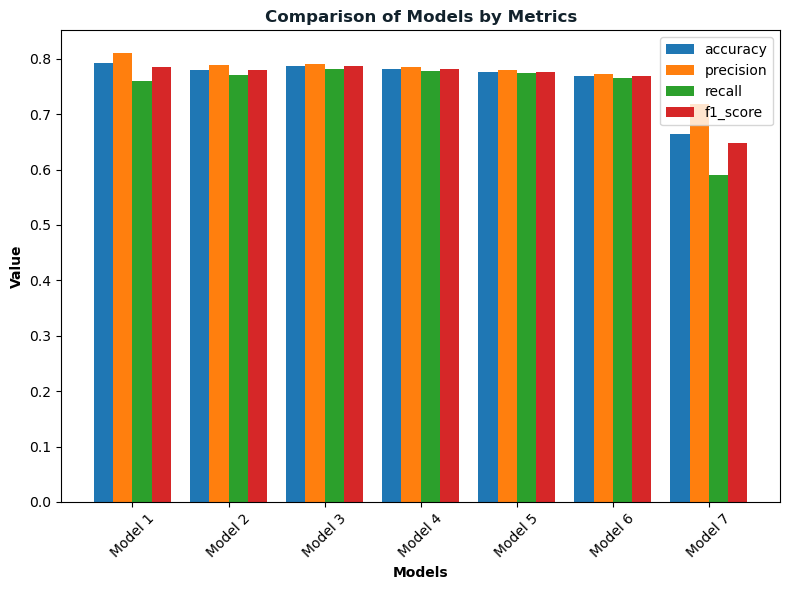

In [80]:
# Extract data
models = list(results.keys())
metrics = list(results[models[0]].keys())
values = {metric: [] for metric in metrics}

for model in models:
    for metric in metrics:
        values[metric].append(results[model][metric])

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))

# Plot each metric
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, values[metric], width, label=metric)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models', fontweight='bold')
ax.set_ylabel('Value', fontweight='bold')
ax.set_title('Comparison of Models by Metrics', fontweight='bold', color='#12222C')
ax.set_xticks(x + width * (len(metrics) / 2 - 0.5))
ax.set_xticklabels(models)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Now, let's view each metric separately:

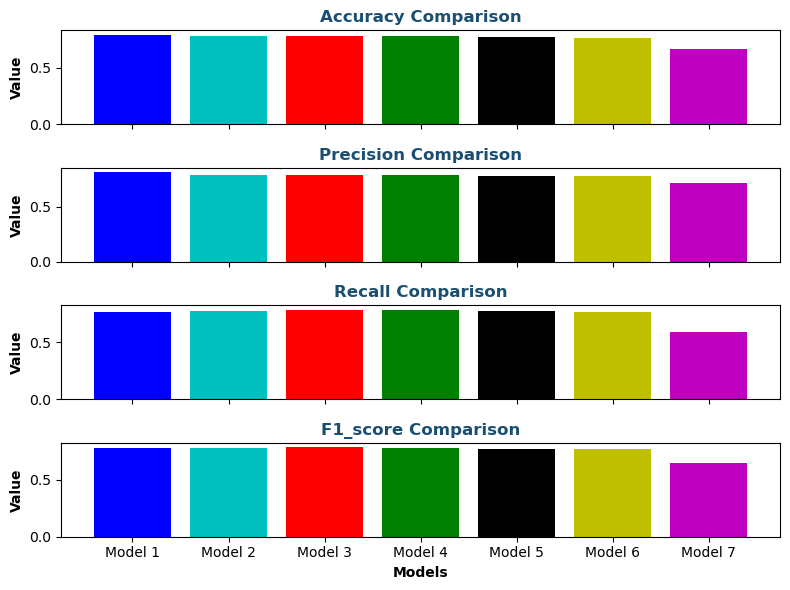

In [81]:
fig, axs = plt.subplots(len(metrics), 1, figsize=(8, 6), sharex=True)

for i, metric in enumerate(metrics):
    values = [results[model][metric] for model in models]
    axs[i].bar(models, values, color=['b', 'c', 'r', 'g', 'k', 'y', 'm'])
    axs[i].set_title(f'{metric.capitalize()} Comparison', fontweight='bold', color='#1B4F72')
    axs[i].set_ylabel('Value', fontweight='bold')

axs[-1].set_xlabel('Models', fontweight='bold')

plt.tight_layout()
plt.show()


To choose the best model, we will use the F1-score as our metric.

It should be noted that this is a simplification, as we are only training for 5 epochs and not considering other factors, such as which models are more prone to overfitting, which ones take longer to train and infer, etc."

In [82]:
# Find the index of the row with the highest F1 score
highest_f1_index = df_metrics['f1_score'].idxmax()

# Get the model with the highest F1 score
best_model = df_metrics.loc[highest_f1_index]

print(f"Model with the highest F1 score:\n{best_model}")

Model with the highest F1 score:
Model         Model 3
accuracy     0.786203
precision      0.7911
recall       0.781727
f1_score     0.786386
Name: 2, dtype: object


<a name="6"></a>
## <b> <font color='blue'> 6. Hyperparamter Tunning </font> </b>

We are going to optimize our selected model using [Keras Tuner](https://keras.io/keras_tuner/). We will try different values for the learning rate and, of course, train for more epochs. We will also use callbacks, such as Early Stopping.

In [83]:
from keras import backend as K
import keras_tuner

In [84]:
class MyHyperModel(keras_tuner.HyperModel) :
     def build(self, hp, input_shape=INPUT_SHAPE, num_classes = NUM_CLASSES):
        inputs = layers.Input(shape=input_shape, dtype=tf.int64)
        x = embedding(inputs)
        x = layers.GRU(64, activation="tanh")(x)
        x = layers.Dense(64, activation="relu")(x)
        outputs = layers.Dense(num_classes, activation="softmax")(x)
        model= tf.keras.Model(inputs, outputs, name='model')
        # compile
        model.compile(optimizer=hp.Choice('optim',['adam','adamax','sgd']),
                      loss="categorical_crossentropy",
                      metrics = ['accuracy','Precision','Recall'])
        
        # A way to optimize the learning rate while also trying different optimizers
        learning_rate = hp.Choice('lr', [ 0.03, 0.01, 0.003])
        K.set_value(model.optimizer.learning_rate, learning_rate)
        # return
        return model



In [85]:
tuner = keras_tuner.BayesianOptimization(
                        hypermodel= MyHyperModel(),
                        objective = "val_accuracy",
                        max_trials = 5, #max candidates to test
                        overwrite = True,
                        directory = 'search_dir',
                        project_name = 'sentiment_analysis')

In [86]:
tuner.search(x=train_dataset, 
             epochs=5,
             validation_data=validation_dataset)

Trial 5 Complete [00h 02m 17s]
val_accuracy: 0.7789115905761719

Best val_accuracy So Far: 0.7990767955780029
Total elapsed time: 00h 09m 54s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [87]:
tuner.results_summary(1)

Results summary
Results in search_dir/sentiment_analysis
Showing 1 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
optim: adam
lr: 0.003
Score: 0.7990767955780029


In [88]:
# mejor modelo
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
final_model = tuner.hypermodel.build(best_hps)

final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 128)           1280000   
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1321603 (5.04 MB)
Trainable params: 1321603 (5.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [89]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
]

final_history = final_model.fit(
                  train_dataset, 
                  validation_data=validation_dataset,
                  epochs=50, 
                  verbose=0,
                  batch_size=BATCH_SIZE,                  
                  callbacks=callbacks)

In [90]:
final_scores = final_model.evaluate(test_dataset)

119/119 [==============================] - 1s 5ms/step - loss: 1.6474 - accuracy: 0.7683 - precision: 0.7693 - recall: 0.7672


<a name="7"></a>
## <b> <font color='blue'> 7. Predictions with the final model </font> </b>

Let's make some predictions with new data.


In [91]:
classes = {
    0: 'negative',
    1: 'neutral',
    2: 'positive'
}

In [92]:
def predict(input_text, model=final_model, preprocess=preprocess_text, vectorizer=vectorizer, classes=classes):
    # preprocessing
    input_text = preprocess_text(input_text)
    input_text = vectorizer(input_text)
    
    # prediction
    pred = final_model.predict(np.array([input_text]),verbose=0)
    
    # choose the max
    ind_max = np.argmax(pred)

    # return
    return classes[ind_max]

In [93]:
texts = ["hot new drug help covid-19", "covid is terrible", "some text", "i'm a little sad"]

for t in texts:
    pred = predict(t)
    print(f"{t} : {pred}\n")

hot new drug help covid-19 : positive

covid is terrible : negative

some text : neutral

i'm a little sad : negative



<a name="8"></a>
## <b> <font color='blue'> 8. Analysis of results </font> </b>

### Confussion matrix

In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [95]:
# For true labels and predictions
true_labels = []
predictions = []

for text, labels in test_dataset:
    # Get the predictions of the model, that are probabilities
    preds = final_model.predict(text, batch_size=32, verbose=0)
    
    # convert one-hot encoded labels to classes
    true_labels.extend(np.argmax(labels.numpy(), axis=1))
    
    # convert predictions to classes
    predictions.extend(np.argmax(preds, axis=1))

# convert arrays to numpy
true_labels = np.array(true_labels)
predictions = np.array(predictions)

# confussion matrix
cm = confusion_matrix(true_labels, predictions)

print("Confussion matrix:")
print(cm)



Confussion matrix:
[[1221  105  307]
 [ 109  417   93]
 [ 211   55 1280]]


Let's look at the confusion matrix in a more friendly way

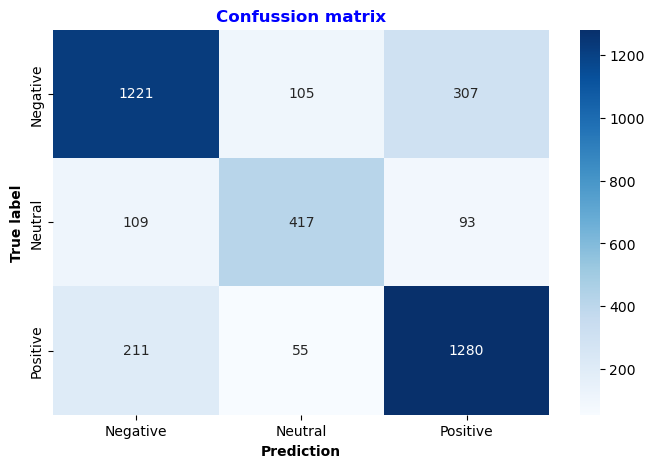

In [96]:
def plot_confussion_matrix(cm, figsize=(8,5)):
    # Creathe the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Neutral', 'Positive'],  # According to the number of classes
                yticklabels=['Negative', 'Neutral', 'Positive'])  # According to the number of classes
    plt.xlabel('Prediction', fontweight='bold')
    plt.ylabel('True label', fontweight='bold')
    plt.title('Confussion matrix', fontweight='bold', color='blue')
    plt.show()
    
    
plot_confussion_matrix(cm)
    

### Missclasified examples

Let's look at some incorrect samples. For this, we need the dataset without passing it through the vectorization layer, as the mapping is not entirely reversible.

In [97]:
true_labels = []
predictions = []
incorrect_samples = []
original_texts = []

for text, labels in test_dataset2:
    # apply text vectorization layer
    text2 = vectorizer(text)
    
    # get predictions
    preds = final_model.predict(text2, verbose=0)
    
    # convert one-hot encoded labels to classes
    true_labels_batch = np.argmax(labels.numpy(), axis=1)
    preds_classes = np.argmax(preds, axis=1)
    
    # identify wrong predictions
    incorrect_indices = np.where(true_labels_batch != preds_classes)[0]
    
    # store true labels, predictions, and original text
    true_labels.extend(true_labels_batch)
    predictions.extend(preds_classes)
    
    # We need to iterate through text.numpy() batch and store each original text separately
    original_texts_batch = text.numpy()
    original_texts.extend(original_texts_batch)
    
    # store incorrect samples
    for index in incorrect_indices:
        incorrect_samples.append((original_texts_batch[index], true_labels_batch[index], preds_classes[index]))

# Convert to numpy arrays
true_labels = np.array(true_labels)
predictions = np.array(predictions)

print(f"Total Incorrect Predictions: {len(incorrect_samples)}")


Total Incorrect Predictions: 880


In [98]:
# See some missclasified examples
for i, (text, true_label, pred_label) in enumerate(incorrect_samples[5:10]):
    print(f"Example {i+1}: True Label: {true_label}, Predicted Label: {pred_label}, \n Text {text}\n")
    

Example 1: True Label: 0, Predicted Label: 2, 
 Text b'everybody stocking toilet paper , i\xc3\xa2\xc2\x92m like wth ? i\xc3\xa2\xc2\x92d rather stock extra food . without , becomes useless . ? ? ? coronavirus'

Example 2: True Label: 1, Predicted Label: 0, 
 Text b'shortage local supermarket hoarding coronavirus covid_19 trumpvirus bleach , rice , paper good'

Example 3: True Label: 2, Predicted Label: 0, 
 Text b'list store closing paying employee , like , actually care : -lush -urban outfitter -fossil -hollister -warby parker -nike -lululemon -apple + good know .'

Example 4: True Label: 0, Predicted Label: 2, 
 Text b'russia dropping oil price screw u.s. drilling & amp ; fracking . china dump wuflu u.s. hope dismantle economy ! forget trump said better deal u election ! bad xi n china ! coronavirus covid_19 trump trump2020'

Example 5: True Label: 2, Predicted Label: 0, 
 Text b"omg corona virus let 's go sit line together grocery store buy supply touch cash register n shit . cleve

<a name="9"></a>
## <b> <font color='blue'> 9. Saving the model </font> </b>

We are going to save the best model.

In [99]:
final_model.save('final_model',save_format='tf')

INFO:tensorflow:Assets written to: final_model/assets


INFO:tensorflow:Assets written to: final_model/assets


<a name="10"></a>
## <b> <font color='blue'> 10. Conclusions </font> </b>

Different models were compared, the best one was selected based on a specific criterion, and it was fine-tuned. A system was obtained that can predict whether a sentiment regarding COVID is positive, negative, or neutral with an accuracy of 77% and an F1-Score of .....%